# [Lab Session 2](otsu.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

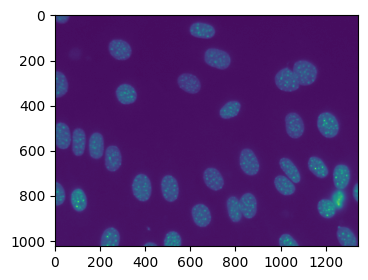

In [36]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')
plt.figure(figsize=(5,3))
plt.imshow(imgf);

**[Task 1.2.]()** Quantify the image into 256 bins:

In [4]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [5]:
h_flat = img8.flatten()
h = np.zeros(256)
for pixel_value in h_flat:
    h[pixel_value] += 1


Show the computed histogram:

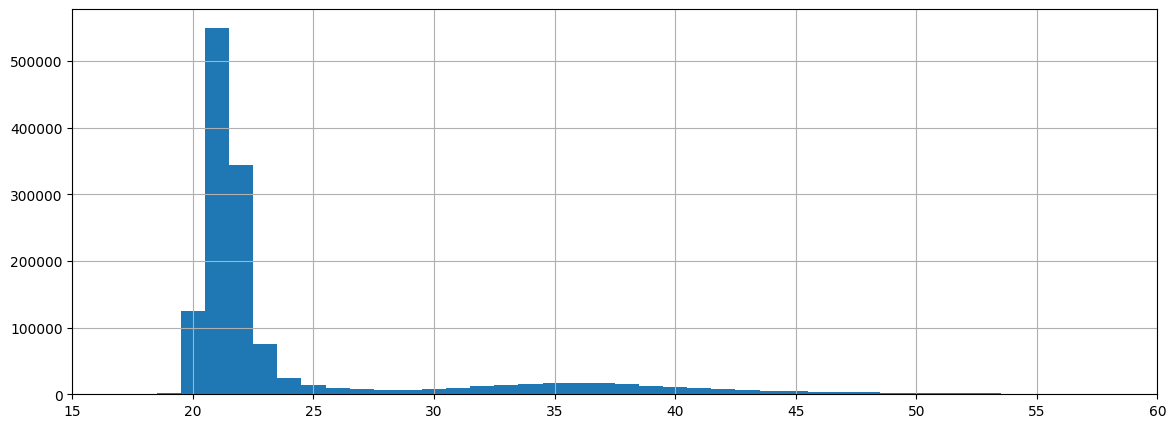

In [31]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1);
plt.xlim(15,60)
plt.grid(True)

**[Task 1.4.]()** Implement the method of Otsu:

In [ ]:
#we want to find the perfect threshold intensity T which maximizes the in between class variance sigma^2
#Otsu-Kriterium = Anzahl Pixel Klasse 1 * var(values) der Pixel [0,T-1] + Anzahl Pixel Klasse 2 * var(values) von [T,255]
#Otsu-Kriterium = n_1*(T)
min_otsu_value = float('inf')
optimal_T = 0
variances = [] #gewichtete Varianzen für jedes T
T_values = range(255) #alle möglichen Schwellenwerte
for T in range(255):
    class_1 = img8[img8 < T] #Pixel Hintergrund
    class_2 = img8[img8 >= T] #Pixel Vordergrund
    var_class_1 = np.var(class_1) if len(class_1) > 0 else 0 #Varianz Klasse 1, wenn Liste leer, auf 0 gesetzt
    var_class_2 = np.var(class_2) if len(class_2) > 0 else 0 #Varianz Klasse 2
    weighted_var = len(class_1) * var_class_1 + len(class_2) * var_class_2 #berechnet die Varianz mit dem gewählten T
    variances.append(weighted_var)
    if weighted_var < min_otsu_value:
        min_otsu_value = weighted_var #speichert die niedrigste Varianz von allen getesteten T
        optimal_T = T #speichert T der niedrigsten Varianz
print("optimal threshold: ", optimal_T) #gibt den optimalen Schwellenwert nach Otsu aus


optimal threshold:  31


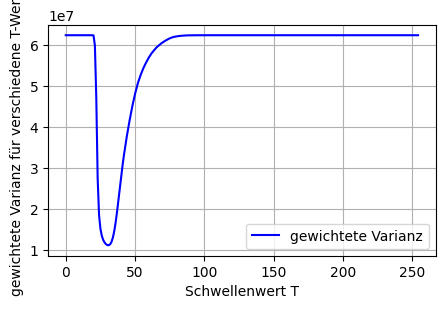

<Figure size 640x480 with 0 Axes>

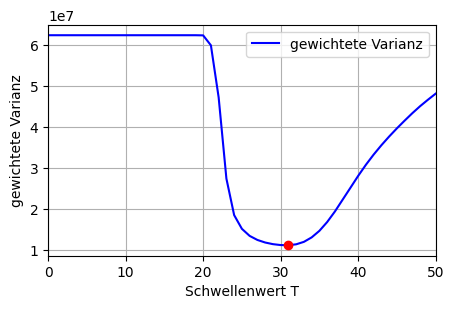

In [39]:
#Schwellenwerte gegen die gewichtete Varianz plotten zur Überprüfung:
plt.figure(figsize=(5,3))
plt.plot(T_values, variances, label='gewichtete Varianz', color='blue')
plt.xlabel('Schwellenwert T')
plt.ylabel('gewichtete Varianz für verschiedene T-Werte')
plt.legend()
plt.grid(True)
plt.show();
plt.clf()
plt.figure(figsize=(5,3))
plt.plot(T_values, variances, label='gewichtete Varianz', color='blue')
plt.xlabel('Schwellenwert T')
plt.ylabel('gewichtete Varianz')
plt.legend()
plt.xlim(0,50)
plt.grid(True)
min_index = np.argmin(variances)  # Index des Minimums
min_T = T_values[min_index]  # Schwellenwert T, bei dem das Minimum auftritt
min_variance = variances[min_index]  # Der Wert der gewichteten Varianz bei diesem T
plt.scatter(min_T, min_variance, color='red', zorder=5, label=f'Minimum bei T={min_T:.2f}')
plt.show();

**[Task 1.5.]()** Perform Otsu thresholding:

In [38]:
T = 31
img8 >= T #True wenn Pixelwerte >= T, sonst False
img8_binarized = (img8 >= T).astype(int) # True wird 1, False wird 0 (int für integer)

**[Task 1.6.]()** Compute the Dice coefficient:

In [40]:
img8_bin_bool = img8_binarized.astype(bool)
#print(X_bin_bool.dtype)
ground_truth = plt.imread('data/NIH3T3/gt/0.png')
ground_truth_bool = ground_truth.astype(bool)
#print(X_bool.dtype)
G = ground_truth_bool > 0
H = img8_bin_bool > 0
G_and_H = G * H
Dice = 2 * (G_and_H.sum()) / (G.sum()+ H.sum())
print("Dice Coefficient = ", Dice)
print("Dice Coefficient = 1 -> perfect overlap")
print("Dice Coefficient = 0 -> no overlap")

Dice Coefficient =  0.8943783223933183
Dice Coefficient = 1 -> perfect overlap
Dice Coefficient = 0 -> no overlap
